# Normalização e redução de dimensionalidade

Nesta seção, iremos entender as principais características dos *data sets* [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) e [Wine Dataset](http://archive.ics.uci.edu/ml/datasets/Wine), bem como reduzir a dimensionalidade e normalização dos atributos.

In [1]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
# from sklearn.min_max_scaler import fit_transform

import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import numpy as np


# Argumentos e pré-definições do seaborn
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set(style="ticks")

filepath_iris = '../data/iris.csv'
filepath_wine = '../data/wine.csv'

## Carregando os dados e entendendo o que eles significam

A primeira parte deste teste é importar as bases de dados e entender o que elas já dizem logo de cara.

### Entendendo o *dataset* Iris
Este dataset apresenta 3 espécies de uma planta florífera do gênero iris, a setosa, versicolor e virginica. Para cada uma das classes existem 50 exemplares e 4 características, ou *features*, que são os comprimentos e larguras tanto da pétala quanto da sépala das flores.

Os dados são importados para um *DataFrame* do *pandas* e descrevemos suas principais características para iniciar a análise. Primeiramente conferimos que a contagem para cada uma das *features* é 150 e também a média para todos os valores, além de outras informações. Este tipo de retorno é interessante para começar a entender como cada característica influencia na identificação da espécie. Mas, levando em conta que nosso objetivo é espécie das flores, seria mais interessante agrupar estes dados, então, justamente pela especie. E é o que faremos em seguida.

In [2]:
iris_df = pd.read_csv(filepath_iris)
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

/usr/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'marker'
  s)


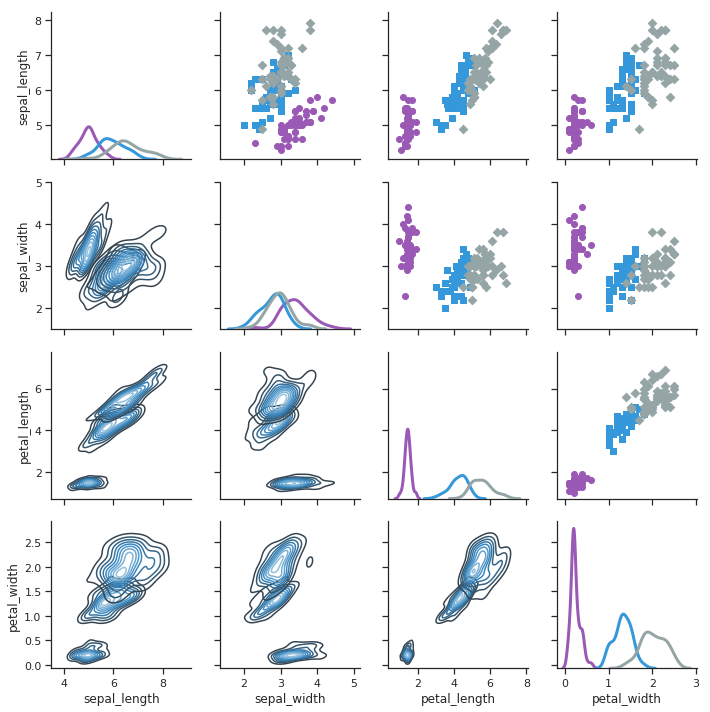

In [5]:
# sns.pairplot(iris_df, hue="species", palette=sns.color_palette(flatui))

g = sns.PairGrid(iris_df, hue="species", palette=sns.color_palette(flatui), hue_kws={"marker": ["o", "s", "D"]})
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, legend=False, lw=3)

In [6]:
X = np.array(iris_df[iris_df.columns[:-1]])
Y = np.array(iris_df.species)

# X = preprocessing.MaxAbsScaler().fit_transform(X)

# X = preprocessing.QuantileTransformer(random_state=0).fit_transform(X)

X = preprocessing.normalize(X, norm='l2')

In [7]:
pca = PCA(n_components=2)
pca.fit(X)

split_2d = pca.transform(X)
pca1,pca2 = zip(*split_2d)

iris_2d = pd.DataFrame( {'PCA1':pca1, 'PCA2':pca2, 'species':Y} )
iris_2d.head()

,PCA1,PCA2,species
0,0.301887,-0.000600,Iris-setosa
1,0.271296,0.040982,Iris-setosa
2,0.297934,0.001074,Iris-setosa
3,0.262920,0.001611,Iris-setosa
4,0.307660,-0.019957,Iris-setosa


/usr/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'marker'
  s)


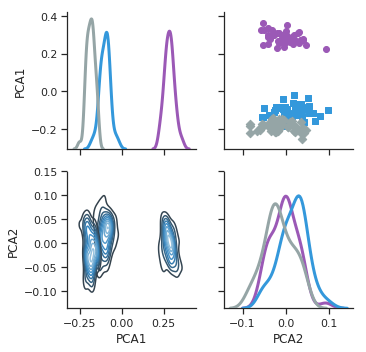

In [8]:
g = sns.PairGrid(iris_2d, hue="species", palette=sns.color_palette(flatui), hue_kws={"marker": ["o", "s", "D"]})
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, legend=False, lw=3)


# sns.pairplot(iris_2d,
#              x_vars=["PCA1", "PCA2"],
#              y_vars=["PCA1", "PCA2"],
#              hue="species", palette=)

In [9]:
iris_2d.to_csv('../data/Iris-norm.csv')

In [13]:
wine_df = pd.read_csv(filepath_wine)
wine_df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [24]:
X = np.array(wine_df[wine_df.columns[:-1]])
Y = np.array(wine_df.Class)

X = preprocessing.normalize(X, norm='l2')

In [25]:
pca = PCA(n_components=2)
pca.fit(X)

split_2d = pca.transform(X)
pca1,pca2 = zip(*split_2d)

wine_2d = pd.DataFrame( {'PCA1':pca1, 'PCA2':pca2, 'Class':Y} )
wine_2d.head()

,PCA1,PCA2,Class
0,-0.077370,-0.005597,1
1,-0.083313,-0.002260,1
2,-0.015811,0.001598,1
3,-0.049861,0.015564,1
4,-0.024909,-0.015507,1


In [26]:
wine_2d.to_csv('../data/Wine-norm.csv')